In [1]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import scale 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [125]:
def data_pre_processing(year):
    # Read in the csvs
    boxScore = pd.read_csv(f"Per_36 Box Score Data/NBA Per_36 Box Score Data {year} - Sheet1.csv")
    shooting = pd.read_csv(f"NBA Shooting Data/NBA Shooting Data {year} - Sheet1.csv")

    # Remove totals for traded players (Dont double count them)
    boxScore = boxScore[(boxScore['Team'] != '2TM') | (boxScore['Team'] != '3TM') | (boxScore['Team'] != '4TM') | (boxScore['Team'] != '5TM')]
    shooting = shooting[(shooting['Team'] != '2TM') | (shooting['Team'] != '3TM') | (shooting['Team'] != '4TM') | (shooting['Team'] != '5TM')]

    # Stats become predictive after 10 - 15 games, so remove small sample sizes
    boxScore = boxScore[boxScore['MP'] > 375]
    shooting = shooting[shooting['MP'] > 375]
    
    # drop unneeded columns
    shooting = shooting.drop(['Rk', 'Age', 'Pos', 'G', 'GS', 'MP', 'FG%', 'avgDistance', '2P (% of FGA)', 
                              '0-3 (% of FGA)', '3-10 (% of FGA)', '2P%', '0-3%', '3-10%', '2P', '3P', 
                              '%FGA', '#', '%3PA', '3P%.1', 'Att.', 'Md.', 'Awards', '-9999'], axis = 1)
    
    # find percentage of shots that are jumpshots and what the players shoot on those shots
    shooting['percJumpshot'] = shooting['10-16 (% of FGA)'] + shooting['16-3P (% of FGA)'] + shooting['3P (% of FGA)']
    shooting['jumpshotPercentage'] = (shooting['10-16%'] * (shooting['10-16 (% of FGA)'] / shooting['percJumpshot'])) + (shooting['16-3P%'] * (shooting['16-3P (% of FGA)'] / shooting['percJumpshot'])) + (shooting['3P%'] * (shooting['3P (% of FGA)'] / shooting['percJumpshot']))
    
    # merge the 2 columns
    df = pd.merge(boxScore, shooting, on = ['Player', 'Team'], how = 'left')

    # drop unneeded columns
    df = df.drop(['Rk', 'Player', 'Team', 'G', 'GS', 'MP', 'FG', '3P', '3PA', '3P%_x', '2P', '2PA', '2P%', 'eFG%', 'FT',
                  'ORB', 'DRB', 'STL', 'BLK', 'TOV', 'Awards', 'Player-additional', '10-16 (% of FGA)', '16-3P (% of FGA)',
                  '3P (% of FGA)', '10-16%', '16-3P%', '3P%_y'], axis = 1)

    # get dummies for Position
    df = pd.get_dummies(df, drop_first = True, dtype = 'int')

    # center and scale predictors
    posIdx = df.apply(lambda x: np.all(x > 0))
    posIdx[-4:] = False
    posIdx = np.array(posIdx)
    
    df.loc[:, posIdx] = df.iloc[:, posIdx].apply(lambda x: boxcox(x + 0.01)[0])
    df.iloc[:, :-4] = df.iloc[:, :-4].apply(lambda x: scale(x))
    
    return boxScore

In [5]:
df2000 = data_pre_processing(2000)
df2001 = data_pre_processing(2001)
df2002 = data_pre_processing(2002)
df2003 = data_pre_processing(2003)
df2004 = data_pre_processing(2004)
df2005 = data_pre_processing(2005)
df2006 = data_pre_processing(2006)
df2007 = data_pre_processing(2007)
df2008 = data_pre_processing(2008)
df2009 = data_pre_processing(2009)
df2010 = data_pre_processing(2010)
df2011 = data_pre_processing(2011)
df2012 = data_pre_processing(2012)
df2013 = data_pre_processing(2013)
df2014 = data_pre_processing(2014)
df2015 = data_pre_processing(2015)
df2016 = data_pre_processing(2016)
df2017 = data_pre_processing(2017)
df2018 = data_pre_processing(2018)
df2019 = data_pre_processing(2019)
df2020 = data_pre_processing(2020)
df2021 = data_pre_processing(2021)
df2022 = data_pre_processing(2022)
df2023 = data_pre_processing(2023)
df2024 = data_pre_processing(2024)

/var/folders/6z/0pv81j2524v8c80qsmnrbmcm0000gn/T/ipykernel_58636/4038727104.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[3.00940938 3.15841206 3.10206706 2.90478568 2.90478568 3.07234555
 3.04148895 2.82674677 2.97600847 3.21106574 2.90478568 2.94117558
 2.94117558 2.90478568 2.78474932 3.23615042 3.21106574 3.04148895
 3.07234555 3.28407657 2.82674677 3.10206706 3.00940938 3.04148895
 3.10206706 3.13073225 2.86669679 3.00940938 2.90478568 3.00940938
 2.94117558 3.07234555 2.97600847 3.21106574 3.04148895 3.07234555
 2.94117558 2.86669679 3.04148895 3.04148895 3.10206706 2.78474932
 3.10206706 2.94117558 3.23615042 3.10206706 3.07234555 3.00940938
 2.97600847 3.13073225 3.23615042 3.00940938 3.00940938 3.10206706
 3.15841206 3.10206706 2.86669679 3.23615042 3.23615042 3.15841206
 3.18517054 2.82674677 2.94117558 2.94117558 3.13073225 3.15841206
 2.78474932 3.18517054 3.13073225 2.90478568 3.30700233 3.2840

In [6]:
df2024.head()

,Age,FGA,FG%,FTA,FT%,TRB,AST,PF,PTS,percJumpshot,jumpshotPercentage,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,1.540352,1.082234,0.314024,2.122285,0.830795,-0.872903,0.874340,-1.235303,1.361855,0.496209,0.932216,0,0,1,0
1,0.216192,0.286073,1.590943,1.264266,-0.772113,1.929609,1.756248,0.315104,0.852870,-1.645574,1.126146,0,0,0,0
2,-0.818270,0.795683,-0.188267,0.357066,0.644554,-0.632328,0.874340,-0.655007,0.733128,0.260289,0.264052,0,1,0,0
3,0.216192,1.082234,-0.373979,0.770072,0.358563,-0.521511,0.323608,-1.912110,0.969377,0.611856,0.366690,0,0,1,0
4,-1.450682,1.489298,-0.059275,2.054633,-0.578244,0.482005,1.013476,-1.082505,1.421549,0.005865,0.114580,1,0,0,0


In [9]:
df2024.columns

Index(['Age', 'FGA', 'FG%', 'FTA', 'FT%', 'TRB', 'AST', 'PF', 'PTS',
       'percJumpshot', 'jumpshotPercentage', 'Pos_PF', 'Pos_PG', 'Pos_SF',
       'Pos_SG'],
      dtype='object')

In [11]:
df = pd.concat([df2000, df2001, df2002, df2003, df2004, df2005, df2006, df2007, df2008, df2009, df2010,
                df2011, df2012, df2013, df2014, df2015, df2016, df2017, df2018, df2019, df2020, df2021,
                df2022, df2023, df2024])

df.head()

,Age,FGA,FG%,FTA,FT%,TRB,AST,PF,PTS,percJumpshot,jumpshotPercentage,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,-0.335046,1.630040,0.319601,-0.022156,0.795720,-0.181355,0.913331,-1.985002,1.382453,0.568160,0.831030,0,0,1,0
1,0.768414,1.778916,0.143809,0.623534,-0.173834,-0.100686,1.782472,-1.823158,1.721239,0.057159,-0.414500,0,1,0,0
2,0.351143,0.811981,-0.114956,0.623534,1.404723,-0.937717,0.515529,-1.669773,0.775377,0.453793,0.614600,0,0,1,0
3,-1.109852,1.600173,1.070183,0.677294,0.146109,1.391362,0.877254,-1.252623,1.676510,0.092170,1.047818,1,0,0,0
4,-1.109852,0.811981,0.473643,1.501009,0.659092,1.047278,0.226062,-0.775497,1.221613,-0.689955,-0.171181,0,0,1,0


In [13]:
df.shape

(10516, 15)

In [15]:
df.isna().sum()

Age                     0
FGA                     0
FG%                     0
FTA                     0
FT%                     0
TRB                     0
AST                     0
PF                      0
PTS                     0
percJumpshot            0
jumpshotPercentage    943
Pos_PF                  0
Pos_PG                  0
Pos_SF                  0
Pos_SG                  0
dtype: int64

In [17]:
percJump = df.drop('jumpshotPercentage', axis = 1)
jumpshotPerc = df.drop('percJumpshot', axis = 1)

In [19]:
percJump.isna().sum()

Age             0
FGA             0
FG%             0
FTA             0
FT%             0
TRB             0
AST             0
PF              0
PTS             0
percJumpshot    0
Pos_PF          0
Pos_PG          0
Pos_SF          0
Pos_SG          0
dtype: int64

In [21]:
jumpshotPerc = jumpshotPerc.dropna()

In [23]:
jumpshotPerc.isna().sum()

Age                   0
FGA                   0
FG%                   0
FTA                   0
FT%                   0
TRB                   0
AST                   0
PF                    0
PTS                   0
jumpshotPercentage    0
Pos_PF                0
Pos_PG                0
Pos_SF                0
Pos_SG                0
dtype: int64

In [25]:
print(len(percJump))
print(len(jumpshotPerc))

10516
9573


# Percentage of FGAs that are Jumpshots

In [28]:
outcomePercJump = pd.DataFrame(percJump['percJumpshot'])
predictorsPercJump = percJump.drop('percJumpshot', axis = 1)

In [30]:
predictorsPercJump.head()

,Age,FGA,FG%,FTA,FT%,TRB,AST,PF,PTS,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,-0.335046,1.630040,0.319601,-0.022156,0.795720,-0.181355,0.913331,-1.985002,1.382453,0,0,1,0
1,0.768414,1.778916,0.143809,0.623534,-0.173834,-0.100686,1.782472,-1.823158,1.721239,0,1,0,0
2,0.351143,0.811981,-0.114956,0.623534,1.404723,-0.937717,0.515529,-1.669773,0.775377,0,0,1,0
3,-1.109852,1.600173,1.070183,0.677294,0.146109,1.391362,0.877254,-1.252623,1.676510,1,0,0,0
4,-1.109852,0.811981,0.473643,1.501009,0.659092,1.047278,0.226062,-0.775497,1.221613,0,0,1,0


In [32]:
outcomePercJump.head()

,percJumpshot
0,0.568160
1,0.057159
2,0.453793
3,0.092170
4,-0.689955


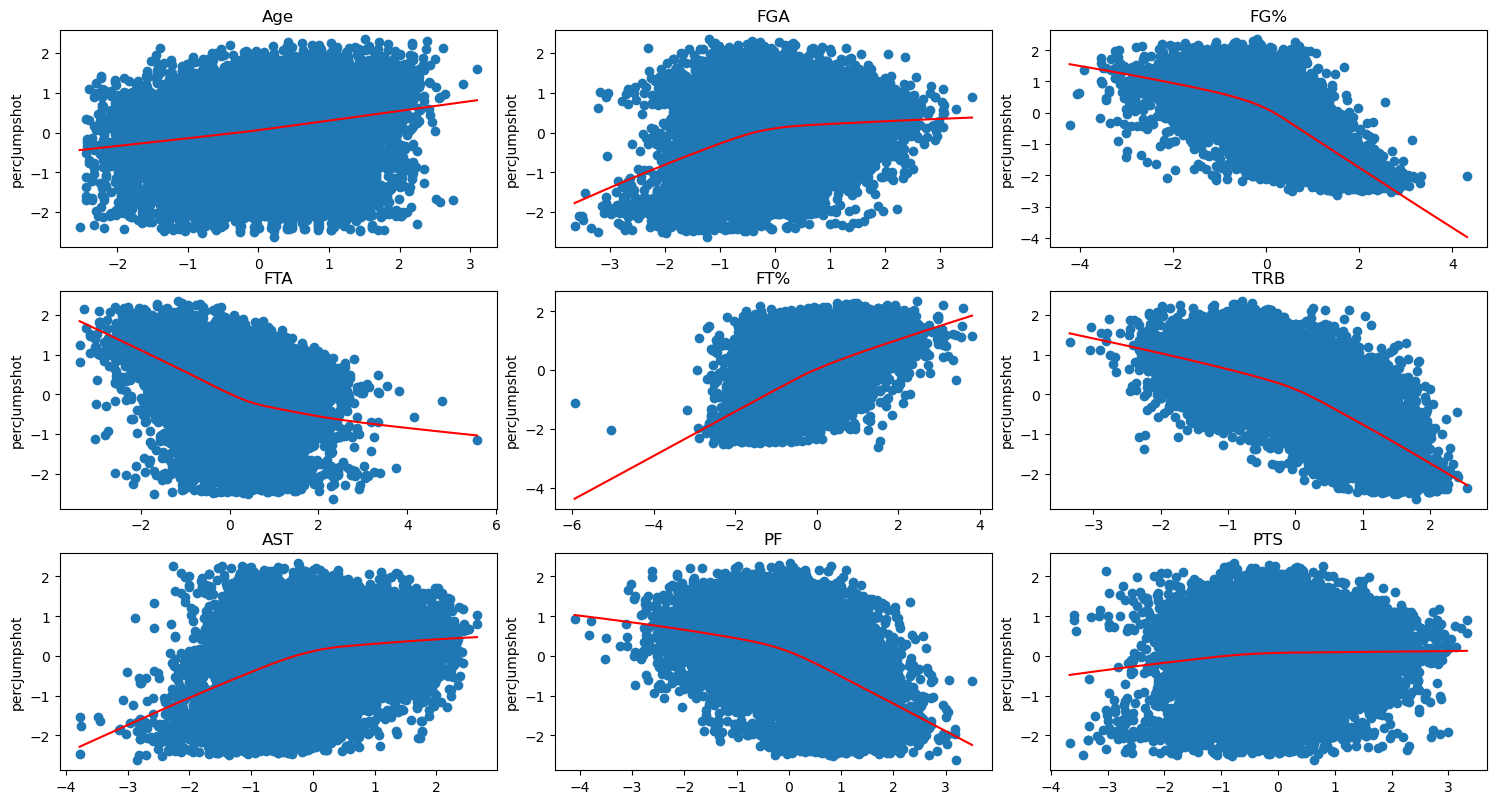

In [34]:
import statsmodels.api as sm

# predictorsContin contains the 9 continuous predictor columns
predictorsContinPercJump = predictorsPercJump[predictorsPercJump.columns[:-4]]

# Run local smoother lowess
lowess = sm.nonparametric.lowess

# Draw scatterplots
nrows = 3
ncols = 3

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 8))
fig.tight_layout()

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate through each column and plot
for i, col in enumerate(predictorsContinPercJump.columns):
    if i >= nrows * ncols:
        break  # Stop if we exceed the number of subplots

    X_graph = predictorsContinPercJump[col]
    z = lowess(np.squeeze(outcomePercJump), np.squeeze(X_graph), frac=0.9)
    
    axs[i].scatter(X_graph, outcomePercJump)
    axs[i].plot(z[:, 0], z[:, 1], 'r')
    axs[i].set_title(col)
    axs[i].set_ylabel(outcomePercJump.columns[0])

# Hide any unused subplots
for j in range(i + 1, nrows * ncols):
    axs[j].axis('off')

plt.show()

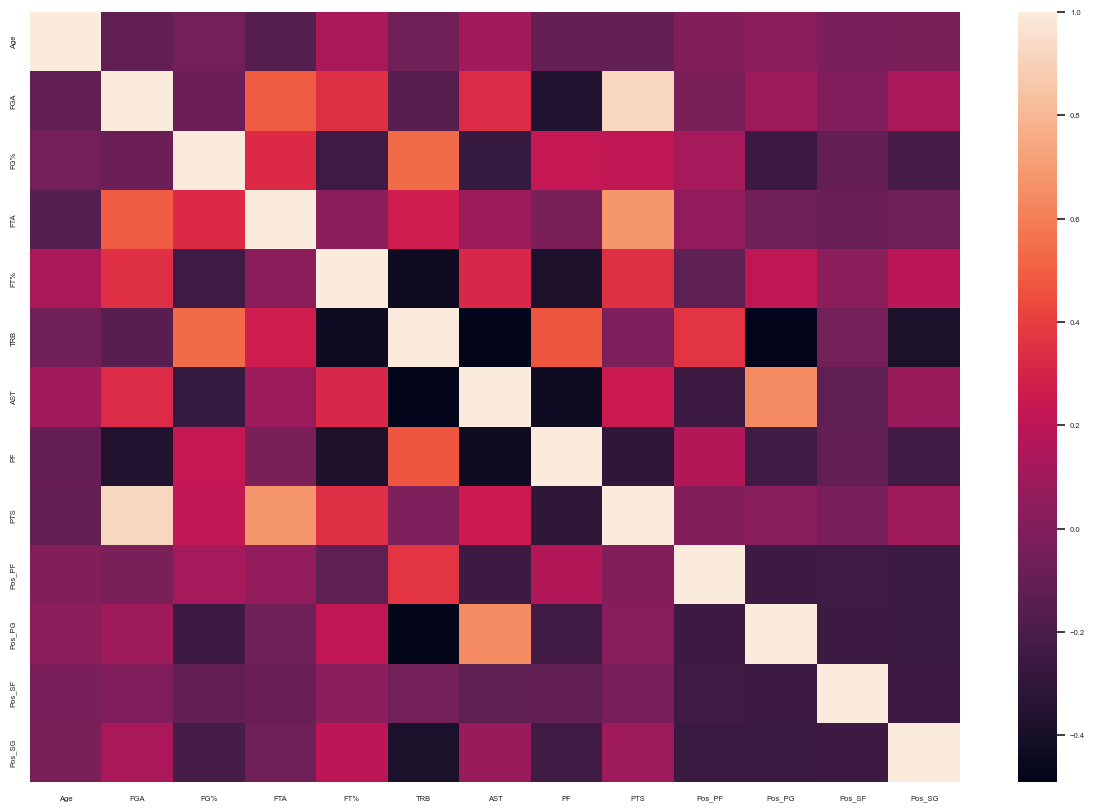

In [35]:
# derive correlation matrix 
corrDataPercJump = predictorsPercJump.corr()
corrDataPercJump.dropna()

# visualize correlation matrix

plt.figure(figsize=(15, 10))
sns.set(font_scale=0.5)
sns.heatmap(corrDataPercJump)
plt.show()

In [38]:
corrDataPercJump

,Age,FGA,FG%,FTA,FT%,TRB,AST,PF,PTS,Pos_PF,Pos_PG,Pos_SF,Pos_SG
Age,1.000000,-0.115152,-0.043251,-0.159943,0.139110,-0.064507,0.104042,-0.098810,-0.109827,0.002284,0.028366,-0.026281,-0.023533
FGA,-0.115152,1.000000,-0.079687,0.491546,0.352200,-0.150753,0.332978,-0.356516,0.920880,-0.019352,0.092009,-0.012489,0.144019
FG%,-0.043251,-0.079687,1.000000,0.324854,-0.243317,0.534662,-0.278685,0.229951,0.218220,0.121688,-0.254940,-0.109919,-0.213582
FTA,-0.159943,0.491546,0.324854,1.000000,0.032762,0.269722,0.089830,-0.021440,0.679293,0.051889,-0.054687,-0.084219,-0.067788
FT%,0.139110,0.352200,-0.243317,0.032762,1.000000,-0.436214,0.313323,-0.378125,0.352601,-0.124905,0.208842,0.030942,0.197724
TRB,-0.064507,-0.150753,0.534662,0.269722,-0.436214,1.000000,-0.490200,0.470777,-0.017238,0.366251,-0.485519,-0.051683,-0.382993
AST,0.104042,0.332978,-0.278685,0.089830,0.313323,-0.490200,1.000000,-0.435146,0.252924,-0.251137,0.643600,-0.124623,0.085841
PF,-0.098810,-0.356516,0.229951,-0.021440,-0.378125,0.470777,-0.435146,1.000000,-0.305574,0.161984,-0.239798,-0.113630,-0.235510
PTS,-0.109827,0.920880,0.218220,0.679293,0.352601,-0.017238,0.252924,-0.305574,1.000000,0.000684,0.019457,-0.032163,0.092112
Pos_PF,0.002284,-0.019352,0.121688,0.051889,-0.124905,0.366251,-0.251137,0.161984,0.000684,1.000000,-0.255114,-0.244927,-0.260401


In [40]:
def eliminateCorr(data, threshold):

    corrData = np.abs(data.corr())
    
    while ((corrData < 1) & (corrData > threshold)).any().any():
    
        bigCorr = 0
        maxCol = ''
        maxInd = ''

        # find the biggest piecewise correlation
        for col in corrData.columns:
            for idx in list(corrData.index):
                if (corrData.loc[idx, col] > bigCorr) & (corrData.loc[idx, col] != 1):
                    bigCorr = corrData.loc[idx, col]
                    maxCol = col
                    maxIdx = idx

        # drop the column with the highest piecewise correlation
        if (np.mean(corrData.loc[maxIdx, :]) > np.mean(corrData.loc[:, maxCol])):
            corrData.drop(maxIdx, axis = 0, inplace = True)
            corrData.drop(maxIdx, axis = 1, inplace = True)
        else:
            corrData.drop(maxCol, axis = 0, inplace = True)
            corrData.drop(maxCol, axis = 1, inplace = True)

    return data[corrData.columns]

In [42]:
predictorsPercJumpReduced = eliminateCorr(predictorsPercJump, 0.75)

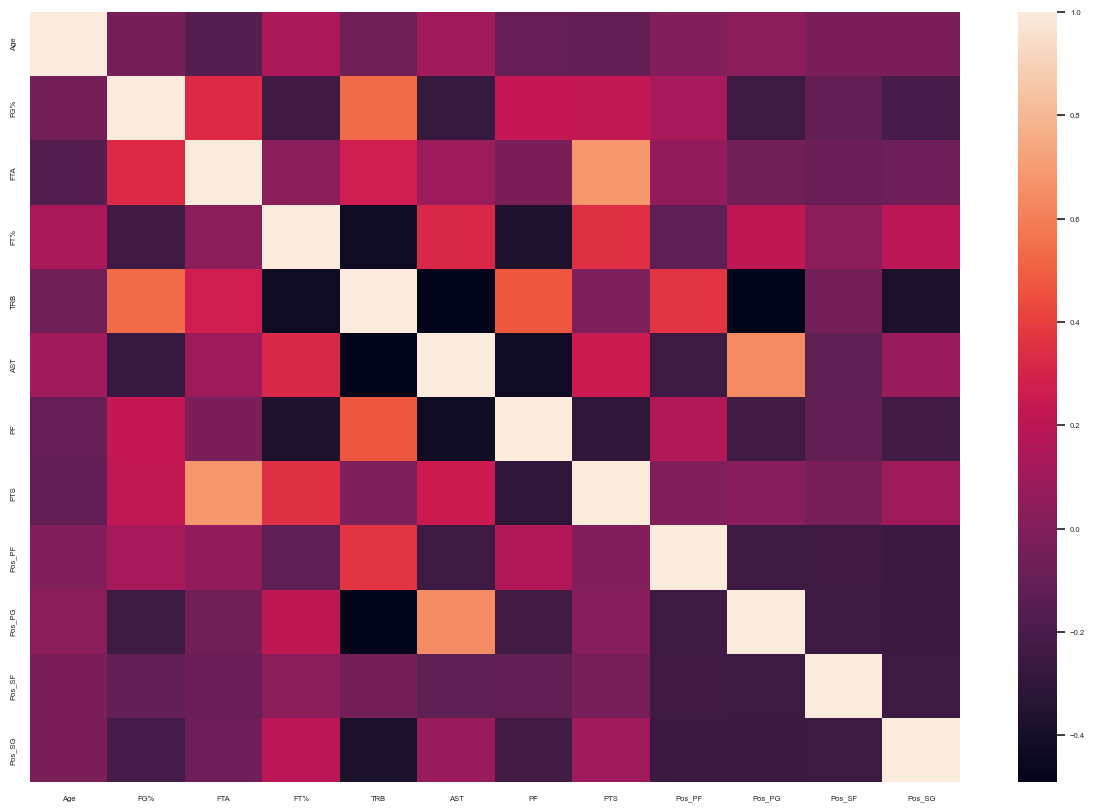

In [44]:
# derive correlation matrix 
corrDataPercJumpReduced = predictorsPercJumpReduced.corr()
corrDataPercJumpReduced.dropna()

# visualize correlation matrix

plt.figure(figsize=(15, 10))
sns.set(font_scale=0.5)
sns.heatmap(corrDataPercJumpReduced)
plt.show()

In [46]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets

xTrainPercJump, xTestPercJump, yTrainPercJump, yTestPercJump = train_test_split(predictorsPercJumpReduced, outcomePercJump, test_size=0.2)

In [48]:
from sklearn.model_selection import RepeatedKFold, cross_validate
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [50]:
# designate cvParam to use for all the models
cvParam = RepeatedKFold(n_splits = 5, n_repeats = 3)

In [52]:
# instantiate Linear Regression
lmPercJump = LinearRegression()

# calculate cv scores
cvScoresPercJumpLM = cross_validate(lmPercJump, xTrainPercJump, yTrainPercJump, cv = cvParam, scoring = ('r2', 'neg_mean_squared_error'), return_train_score = True)
rmsePercJumpLM = np.sqrt(-1 * np.mean(cvScoresPercJumpLM['train_neg_mean_squared_error']))

print('train RMSE: ' + str(rmsePercJumpLM))
print('train r2: ' + str(np.mean(cvScoresPercJumpLM['train_r2'])))

train RMSE: 0.462067713318623
train r2: 0.7863040181775877


In [54]:
# test against the test set
lmPercJump.fit(xTrainPercJump, yTrainPercJump)
yPercJumpPredLm = lmPercJump.predict(xTestPercJump)

testPercJumpR2lm = r2_score(yPercJumpPredLm, yTestPercJump)
testPercJumpRMSElm = np.sqrt(mean_squared_error(yPercJumpPredLm, yTestPercJump))

print('test RMSE: '+str(testPercJumpRMSElm))
print('test r2: '+str(testPercJumpR2lm))

test RMSE: 0.4622490841903395
test r2: 0.7246352564478165


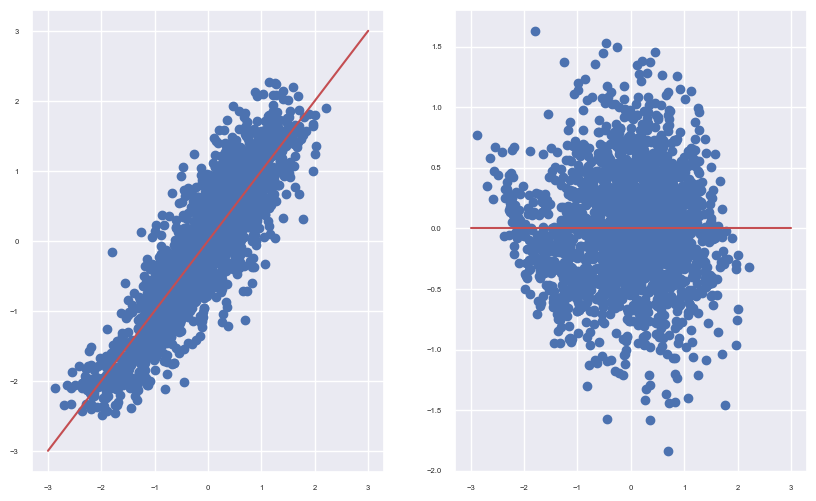

In [56]:
# graph predictions vs test set
yRange = np.linspace(-3, 3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.scatter(yPercJumpPredLm, yTestPercJump)
ax1.plot(yRange, yRange, c = 'r')

ax2.scatter(yPercJumpPredLm, yTestPercJump - yPercJumpPredLm)
ax2.plot(yRange, (yRange - yRange), c = 'r')

plt.show()

In [58]:
# instantiate PLS Regression

rmsePercJumpPLS = []
r2PercJumpPLS = []

for i in range(1, 13):
    pls = PLSRegression(n_components = i)
    score = cross_validate(pls, xTrainPercJump, yTrainPercJump, cv = cvParam, scoring = ('r2', 'neg_mean_squared_error'), return_train_score = True)
    rmsePercJumpPLS.append(np.sqrt(-np.mean(score['train_neg_mean_squared_error'])))
    r2PercJumpPLS.append(np.mean(score['train_r2']))

# print minimum RMSE for PLS
print('Minimum RMSE for PLS: ' + str(np.min(rmsePercJumpPLS)))

# number of units used for min RMSE
print('# of components for RMSE PLS: ' + str(np.argmin(rmsePercJumpPLS)))

print('==========================')

# maximum r2 for PLS
print('Maximum r2 for PLS: ' + str(np.max(r2PercJumpPLS)))

# number of units used for max r2
print('# of components for R2 PLS: ' + str(np.argmax(r2PercJumpPLS)))

Minimum RMSE for PLS: 0.4620584222975419
# of components for RMSE PLS: 9
Maximum r2 for PLS: 0.7863178203042229
# of components for R2 PLS: 9


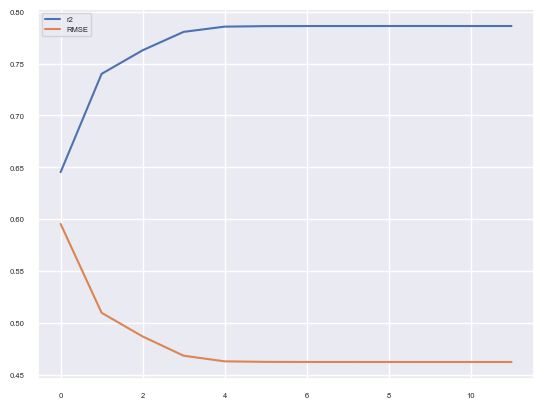

In [60]:
plt.plot(r2PercJumpPLS, label = 'r2')
plt.plot(rmsePercJumpPLS, label = 'RMSE')
plt.legend()
plt.show()

In [62]:
# get predictions
plsPercJump = PLSRegression(n_components = 9)
plsPercJump.fit(xTrainPercJump, yTrainPercJump)
yPercJumpPredPLS = plsPercJump.predict(xTestPercJump)

testPercJumpR2pls = r2_score(yPercJumpPredPLS, yTestPercJump)
testPercJumpRMSEpls = np.sqrt(mean_squared_error(yPercJumpPredPLS, yTestPercJump))

print('test RMSE: '+str(testPercJumpRMSEpls))
print('test r2: '+str(testPercJumpR2pls))

test RMSE: 0.46224887979255974
test r2: 0.7246082171248573


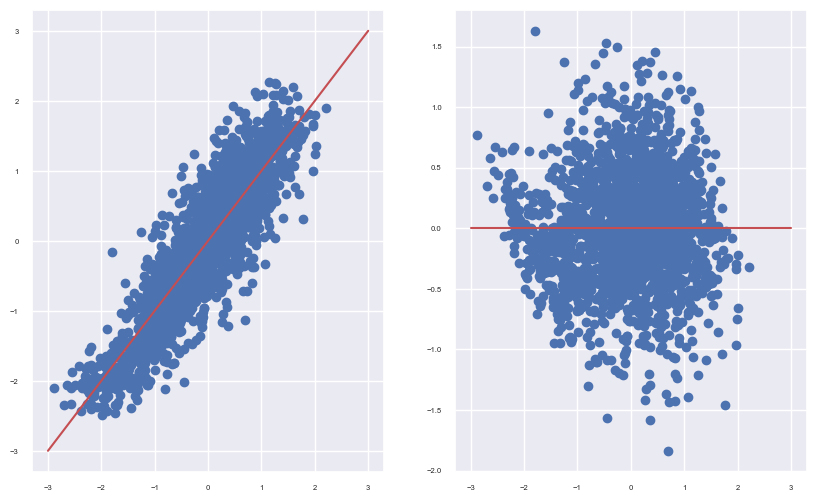

In [64]:
# graph predictions vs test set
yRange = np.linspace(-3, 3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.scatter(yPercJumpPredPLS, yTestPercJump)
ax1.plot(yRange, yRange, c = 'r')

ax2.scatter(yPercJumpPredPLS, yTestPercJump - yPercJumpPredPLS)
ax2.plot(yRange, (yRange - yRange), c = 'r')

plt.show()

In [66]:
# GridSearch Ridge Regression

ridgeParam = {'alpha': np.linspace(0, 50, 51)}

gsRidgePercJump = GridSearchCV(Ridge(), ridgeParam, cv = cvParam, n_jobs = -1)
gsRidgePercJump.fit(xTrainPercJump, yTrainPercJump)

gsPercJumpCVridge = pd.DataFrame(gsRidgePercJump.cv_results_)[['mean_test_score', 'std_test_score' , 'params']]
gsPercJumpCVridge

,mean_test_score,std_test_score,params
0,0.784936,0.008426,{'alpha': 0.0}
1,0.784937,0.008427,{'alpha': 1.0}
2,0.784938,0.008428,{'alpha': 2.0}
3,0.784939,0.008429,{'alpha': 3.0}
4,0.784939,0.008430,{'alpha': 4.0}
5,0.784939,0.008431,{'alpha': 5.0}
6,0.784940,0.008432,{'alpha': 6.0}
7,0.784940,0.008433,{'alpha': 7.0}
8,0.784940,0.008434,{'alpha': 8.0}
9,0.784940,0.008435,{'alpha': 9.0}


In [70]:
# calculate cv scores
cvScoresRidgePercJump = cross_validate(gsRidgePercJump, xTrainPercJump, yTrainPercJump, cv = cvParam, scoring = ('r2', 'neg_mean_squared_error'), return_train_score = True)
rmseRidgePercJump = np.sqrt(-1 * np.mean(cvScoresRidgePercJump['train_neg_mean_squared_error']))

print('train RMSE: ' + str(rmseRidgePercJump))
print('train r2: ' + str(np.mean(cvScoresRidgePercJump['train_r2'])))
gsRidgePercJump.best_estimator_

train RMSE: 0.4620550985975268
train r2: 0.7863120522617754


Ridge(alpha=7.0)

In [72]:
# test against the test set
yPercJumpPredRidge = gsRidgePercJump.predict(xTestPercJump)

testPercJumpR2ridge = r2_score(yPercJumpPredRidge, yTestPercJump)
testPercJumpRMSEridge = np.sqrt(mean_squared_error(yPercJumpPredRidge, yTestPercJump))

print('test RMSE: '+str(testPercJumpRMSEridge))
print('test r2: '+str(testPercJumpR2ridge))

test RMSE: 0.46228857482705893
test r2: 0.7241743591009133


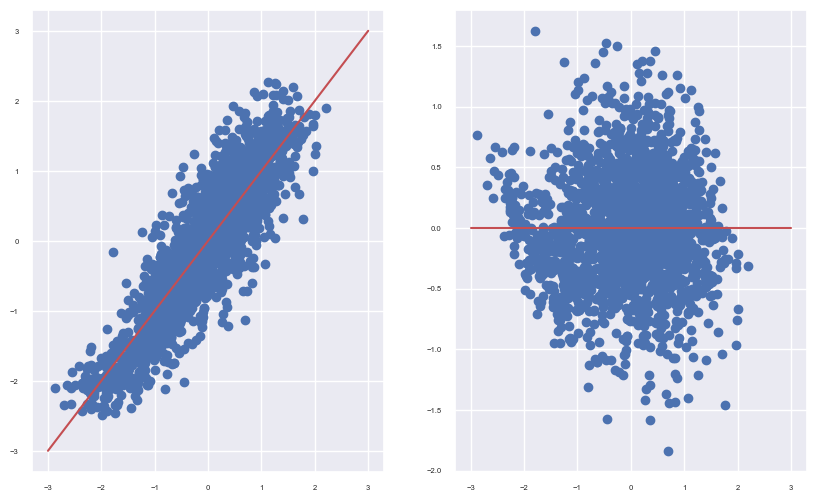

In [74]:
# graph predictions vs test set
yRange = np.linspace(-3, 3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.scatter(yPercJumpPredRidge, yTestPercJump)
ax1.plot(yRange, yRange, c = 'r')

ax2.scatter(yPercJumpPredRidge, yTestPercJump - yPercJumpPredRidge)
ax2.plot(yRange, (yRange - yRange), c = 'r')

plt.show()

In [76]:
# Grid Search SVM model

svmParams = {'kernel': ['poly','rbf'],
             'epsilon': [0.01, 0.05, 0.1, 0.5, 1],
             'C': [0.1, 1, 5, 10, 15, 25]}

gsPercJumpSVM = GridSearchCV(SVR(), svmParams, cv = 5, n_jobs = -1)
gsPercJumpSVM.fit(xTrainPercJump, np.ravel(yTrainPercJump))

gsPercJumpCVsvm = pd.DataFrame(gsPercJumpSVM.cv_results_)[['mean_test_score', 'std_test_score' , 'params']]
gsPercJumpCVsvm

,mean_test_score,std_test_score,params
0,0.676798,0.013865,"{'C': 0.1, 'epsilon': 0.01, 'kernel': 'poly'}"
1,0.802601,0.007163,"{'C': 0.1, 'epsilon': 0.01, 'kernel': 'rbf'}"
2,0.677355,0.014006,"{'C': 0.1, 'epsilon': 0.05, 'kernel': 'poly'}"
3,0.802708,0.007229,"{'C': 0.1, 'epsilon': 0.05, 'kernel': 'rbf'}"
4,0.676504,0.015066,"{'C': 0.1, 'epsilon': 0.1, 'kernel': 'poly'}"
5,0.802652,0.007343,"{'C': 0.1, 'epsilon': 0.1, 'kernel': 'rbf'}"
6,0.671496,0.014031,"{'C': 0.1, 'epsilon': 0.5, 'kernel': 'poly'}"
7,0.793476,0.006248,"{'C': 0.1, 'epsilon': 0.5, 'kernel': 'rbf'}"
8,0.627331,0.004235,"{'C': 0.1, 'epsilon': 1, 'kernel': 'poly'}"
9,0.736883,0.003198,"{'C': 0.1, 'epsilon': 1, 'kernel': 'rbf'}"


In [77]:
# calculate cv scores
cvScoresPercJumpSVM = cross_validate(gsPercJumpSVM, xTrainPercJump, np.ravel(yTrainPercJump), cv = 5, scoring = ('r2', 'neg_mean_squared_error'), return_train_score = True)
rmsePercJumpSVM = np.sqrt(-1 * np.mean(cvScoresPercJumpSVM['train_neg_mean_squared_error']))

print('train RMSE: ' + str(rmsePercJumpSVM))
print('train r2: ' + str(np.mean(cvScoresPercJumpSVM['train_r2'])))
print('Best Estimator: ' + str(gsPercJumpCVsvm.loc[(gsPercJumpCVsvm['mean_test_score'] == gsPercJumpCVsvm['mean_test_score'].max()), 'params']))

train RMSE: 0.39095312702091917
train r2: 0.847011374317181
Best Estimator: 15    {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}
Name: params, dtype: object


In [78]:
# test against the test set
yPercJumpPredSVR = gsPercJumpSVM.predict(xTestPercJump)

testPercJumpR2svr = r2_score(yPercJumpPredSVR, yTestPercJump)
testPercJumpRMSEsvr = np.sqrt(mean_squared_error(yPercJumpPredSVR, yTestPercJump))

print('test RMSE: '+str(testPercJumpRMSEsvr))
print('test r2: '+str(testPercJumpR2svr))

test RMSE: 0.4276300362725167
test r2: 0.7777829203440716


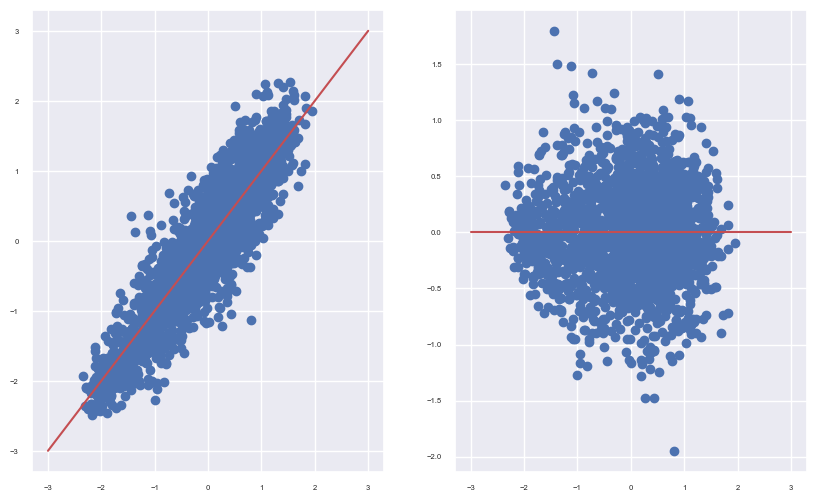

In [79]:
# graph predictions vs test set
yRange = np.linspace(-3, 3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.scatter(yPercJumpPredSVR, yTestPercJump)
ax1.plot(yRange, yRange, c = 'r')

ax2.scatter(yPercJumpPredSVR, (yTestPercJump - yPercJumpPredSVR.reshape(yTestPercJump.shape)))
ax2.plot(yRange, (yRange - yRange), c = 'r')

plt.show()

In [90]:
# Grid Search MLPRegressor

import warnings
warnings.filterwarnings("ignore")

mlpParams = {'hidden_layer_sizes': [(10, ), (50, ), (100, ), (50, 20, ), (100, 50, ), (50, 30, 10, ), (100, 50, 20, ), (50, 30, 20, 10, )],
            'alpha': [0.00, 0.0001, 0.001, 0.01, 0.1, 1],
            'max_iter': [500, 1000]}

gsPercJumpMLP = GridSearchCV(MLPRegressor(), mlpParams, cv = 5, n_jobs = -1)
gsPercJumpMLP.fit(xTrainPercJump, np.ravel(yTrainPercJump))

gsPercJumpCVmlp = pd.DataFrame(gsPercJumpMLP.cv_results_)[['mean_test_score', 'std_test_score' , 'params']]
gsPercJumpCVmlp

,mean_test_score,std_test_score,params
0,0.804748,0.007798,"{'alpha': 0.0, 'hidden_layer_sizes': (10,), 'm..."
1,0.803404,0.010008,"{'alpha': 0.0, 'hidden_layer_sizes': (10,), 'm..."
2,0.808454,0.007436,"{'alpha': 0.0, 'hidden_layer_sizes': (50,), 'm..."
3,0.809009,0.006330,"{'alpha': 0.0, 'hidden_layer_sizes': (50,), 'm..."
4,0.810486,0.004927,"{'alpha': 0.0, 'hidden_layer_sizes': (100,), '..."
...,...,...,...
91,0.812908,0.009716,"{'alpha': 1, 'hidden_layer_sizes': (50, 30, 10..."
92,0.811922,0.011196,"{'alpha': 1, 'hidden_layer_sizes': (100, 50, 2..."
93,0.811873,0.009139,"{'alpha': 1, 'hidden_layer_sizes': (100, 50, 2..."
94,0.811469,0.010243,"{'alpha': 1, 'hidden_layer_sizes': (50, 30, 20..."


In [93]:
# calculate cv scores
cvScoresPercJumpMLP = cross_validate(gsPercJumpMLP, xTrainPercJump, np.ravel(yTrainPercJump), cv = 5, scoring = ('r2', 'neg_mean_squared_error'), return_train_score = True)
rmsePercJumpMLP = np.sqrt(-1 * np.mean(cvScoresPercJumpMLP['train_neg_mean_squared_error']))

print('train RMSE: ' + str(rmsePercJumpMLP))
print('train r2: ' + str(np.mean(cvScoresPercJumpMLP['train_r2'])))
print('Best Estimator: ' + str(gsPercJumpCVmlp.loc[(gsPercJumpCVmlp['mean_test_score'] == gsPercJumpCVmlp['mean_test_score'].max()), 'params']))

train RMSE: 0.40955194851780397
train r2: 0.8321390249851633
Best Estimator: 69    {'alpha': 0.1, 'hidden_layer_sizes': (100,), '...
Name: params, dtype: object


In [97]:
# test against the test set
yPercJumpPredMLP = gsPercJumpMLP.predict(xTestPercJump)

testPercJumpR2mlp = r2_score(yPercJumpPredMLP, yTestPercJump)
testPercJumpRMSEmlp = np.sqrt(mean_squared_error(yPercJumpPredMLP, yTestPercJump))

print('test RMSE: '+str(testPercJumpRMSEmlp))
print('test r2: '+str(testPercJumpR2mlp))

test RMSE: 0.4289209989243578
test r2: 0.7764839272434896


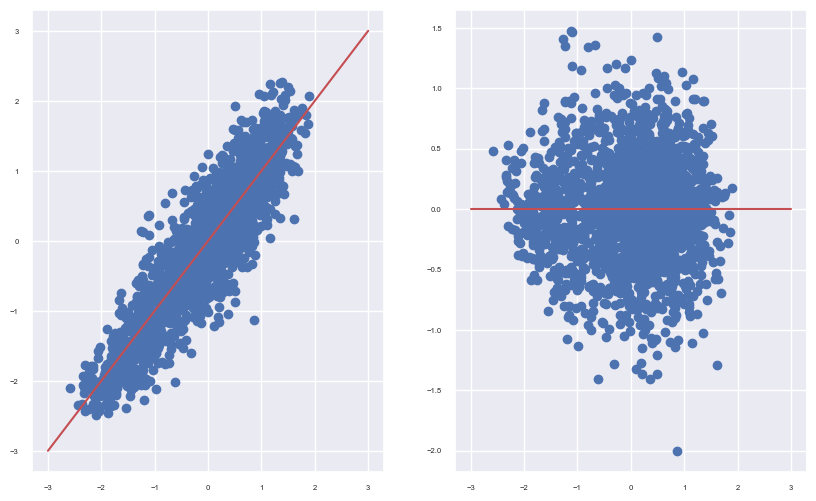

In [101]:
# graph predictions vs test set
yRange = np.linspace(-3, 3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.scatter(yPercJumpPredMLP, yTestPercJump)
ax1.plot(yRange, yRange, c = 'r')

ax2.scatter(yPercJumpPredMLP, yTestPercJump - yPercJumpPredMLP.reshape(yTestPercJump.shape))
ax2.plot(yRange, (yRange - yRange), c = 'r')

plt.show()

# Jumpshot Percentage

In [111]:
outcomeJumpPerc = pd.DataFrame(jumpshotPerc['jumpshotPercentage'])
predictorsJumpPerc = jumpshotPerc.drop('jumpshotPercentage', axis = 1)

In [113]:
predictorsJumpPerc.head()

,Age,FGA,FG%,FTA,FT%,TRB,AST,PF,PTS,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,-0.335046,1.630040,0.319601,-0.022156,0.795720,-0.181355,0.913331,-1.985002,1.382453,0,0,1,0
1,0.768414,1.778916,0.143809,0.623534,-0.173834,-0.100686,1.782472,-1.823158,1.721239,0,1,0,0
2,0.351143,0.811981,-0.114956,0.623534,1.404723,-0.937717,0.515529,-1.669773,0.775377,0,0,1,0
3,-1.109852,1.600173,1.070183,0.677294,0.146109,1.391362,0.877254,-1.252623,1.676510,1,0,0,0
4,-1.109852,0.811981,0.473643,1.501009,0.659092,1.047278,0.226062,-0.775497,1.221613,0,0,1,0


In [115]:
outcomeJumpPerc.head()

,jumpshotPercentage
0,0.831030
1,-0.414500
2,0.614600
3,1.047818
4,-0.171181


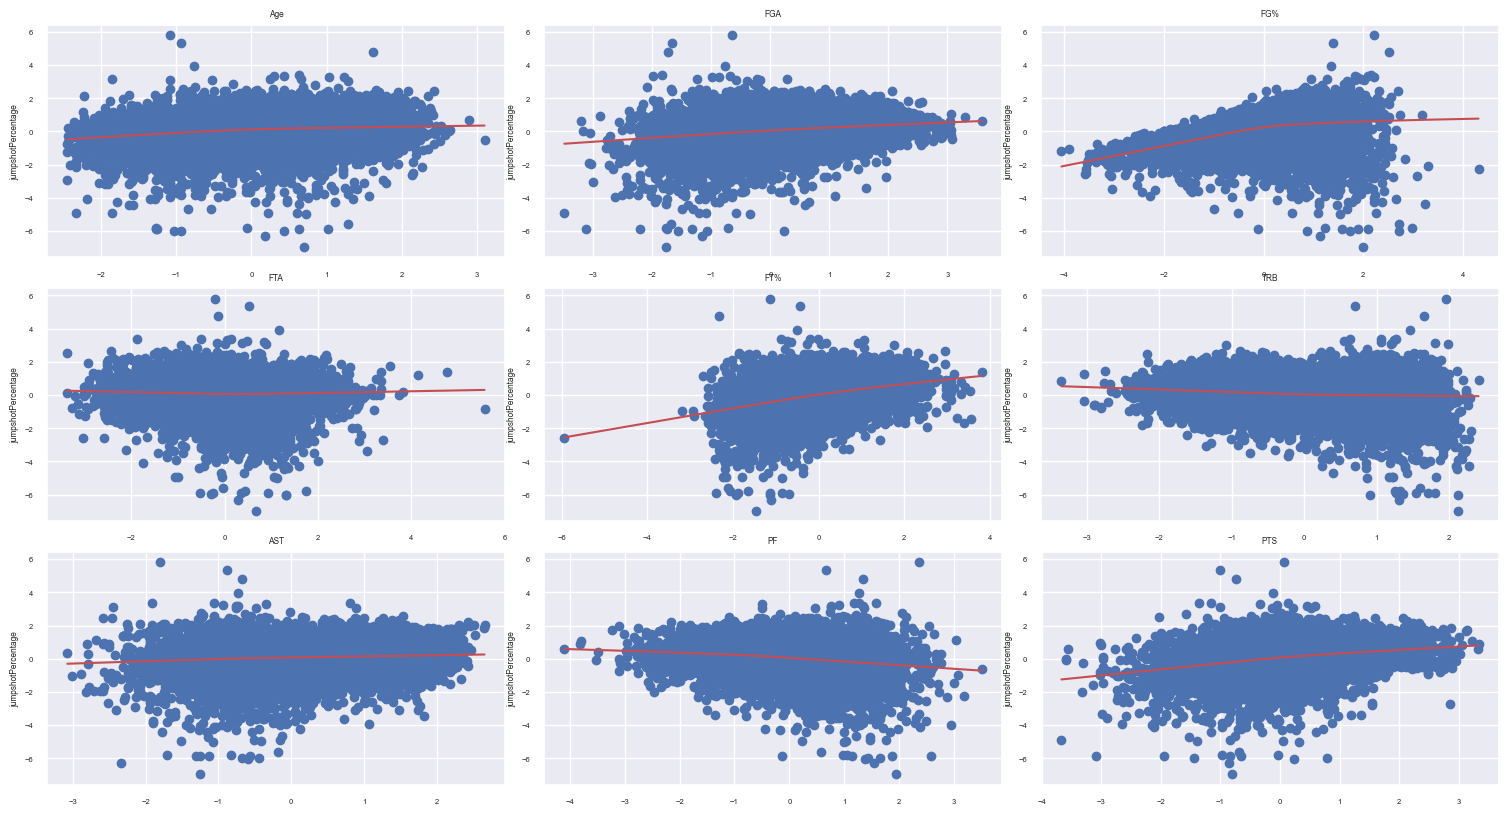

In [117]:
import statsmodels.api as sm

# predictorsContin contains the 9 continuous predictor columns
predictorsContinJumpPerc = predictorsJumpPerc[predictorsJumpPerc.columns[:-4]]

# Run local smoother lowess
lowess = sm.nonparametric.lowess

# Draw scatterplots
nrows = 3
ncols = 3

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 8))
fig.tight_layout()

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate through each column and plot
for i, col in enumerate(predictorsContinJumpPerc.columns):
    if i >= nrows * ncols:
        break  # Stop if we exceed the number of subplots

    X_graph = predictorsContinJumpPerc[col]
    z = lowess(np.squeeze(outcomeJumpPerc), np.squeeze(X_graph), frac=0.9)
    
    axs[i].scatter(X_graph, outcomeJumpPerc)
    axs[i].plot(z[:, 0], z[:, 1], 'r')
    axs[i].set_title(col)
    axs[i].set_ylabel(outcomeJumpPerc.columns[0])

# Hide any unused subplots
for j in range(i + 1, nrows * ncols):
    axs[j].axis('off')

plt.show()

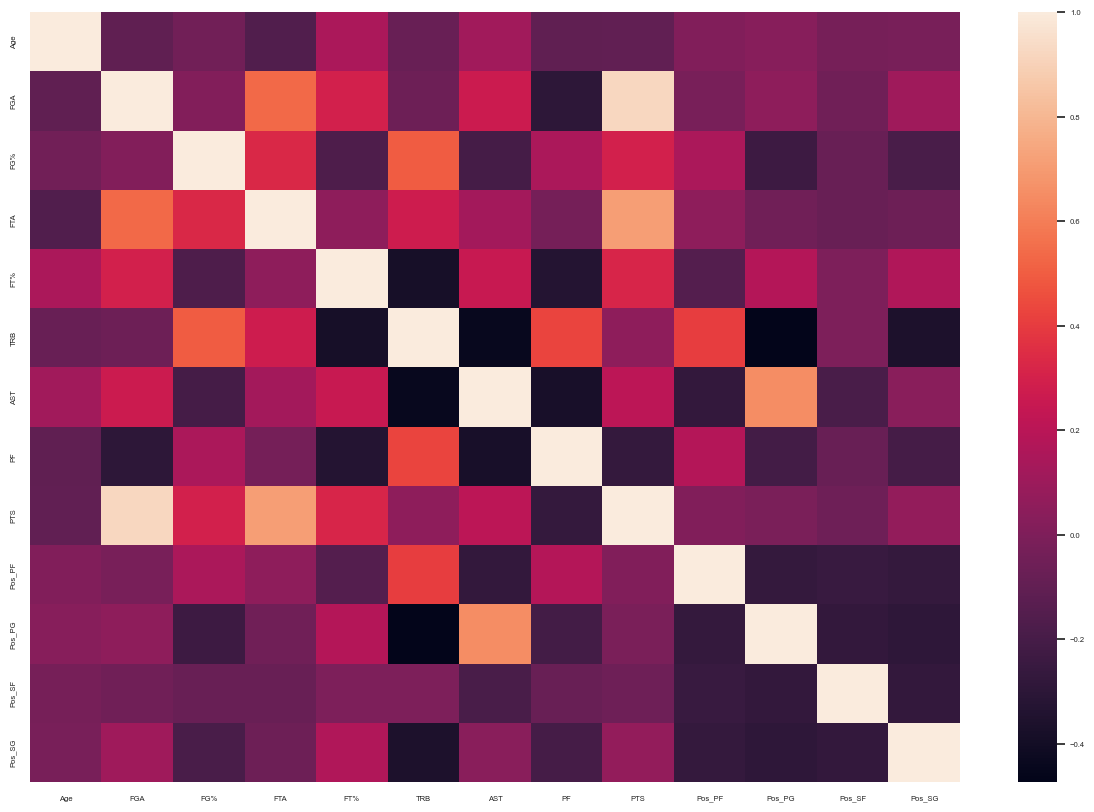

In [151]:
# derive correlation matrix 
corrDataJumpPerc = predictorsJumpPerc.corr()
corrDataJumpPerc.dropna()

# visualize correlation matrix

plt.figure(figsize=(15, 10))
sns.set(font_scale=0.5)
sns.heatmap(corrDataJumpPerc)
plt.show()

In [153]:
corrDataJumpPerc

,Age,FGA,FG%,FTA,FT%,TRB,AST,PF,PTS,Pos_PF,Pos_PG,Pos_SF,Pos_SG
Age,1.000000,-0.110520,-0.045232,-0.159867,0.153202,-0.078204,0.113736,-0.106259,-0.100375,0.009164,0.032019,-0.026378,-0.022308
FGA,-0.110520,1.000000,0.013688,0.538951,0.293372,-0.061919,0.264540,-0.297834,0.923060,-0.019105,0.051058,-0.051968,0.113044
FG%,-0.045232,0.013688,1.000000,0.329072,-0.170356,0.495954,-0.205144,0.153782,0.295714,0.150906,-0.233937,-0.076510,-0.185918
FTA,-0.159867,0.538951,0.329072,1.000000,0.051715,0.272997,0.124939,-0.035816,0.707887,0.053734,-0.051180,-0.078545,-0.061783
FT%,0.153202,0.293372,-0.170356,0.051715,1.000000,-0.385418,0.248635,-0.332549,0.317545,-0.146078,0.180168,-0.004493,0.170920
TRB,-0.078204,-0.061919,0.495954,0.272997,-0.385418,1.000000,-0.441101,0.427717,0.051901,0.404700,-0.473415,-0.003156,-0.358929
AST,0.113736,0.264540,-0.205144,0.124939,0.248635,-0.441101,1.000000,-0.380410,0.206338,-0.276668,0.653921,-0.186039,0.035948
PF,-0.106259,-0.297834,0.153782,-0.035816,-0.332549,0.427717,-0.380410,1.000000,-0.267228,0.180681,-0.209978,-0.078373,-0.206396
PTS,-0.100375,0.923060,0.295714,0.707887,0.317545,0.051901,0.206338,-0.267228,1.000000,0.005419,-0.013939,-0.058725,0.069627
Pos_PF,0.009164,-0.019105,0.150906,0.053734,-0.146078,0.404700,-0.276668,0.180681,0.005419,1.000000,-0.266967,-0.252399,-0.271375


In [159]:
predictorsJumpPercReduced = predictorsJumpPerc.drop('FGA', axis = 1)

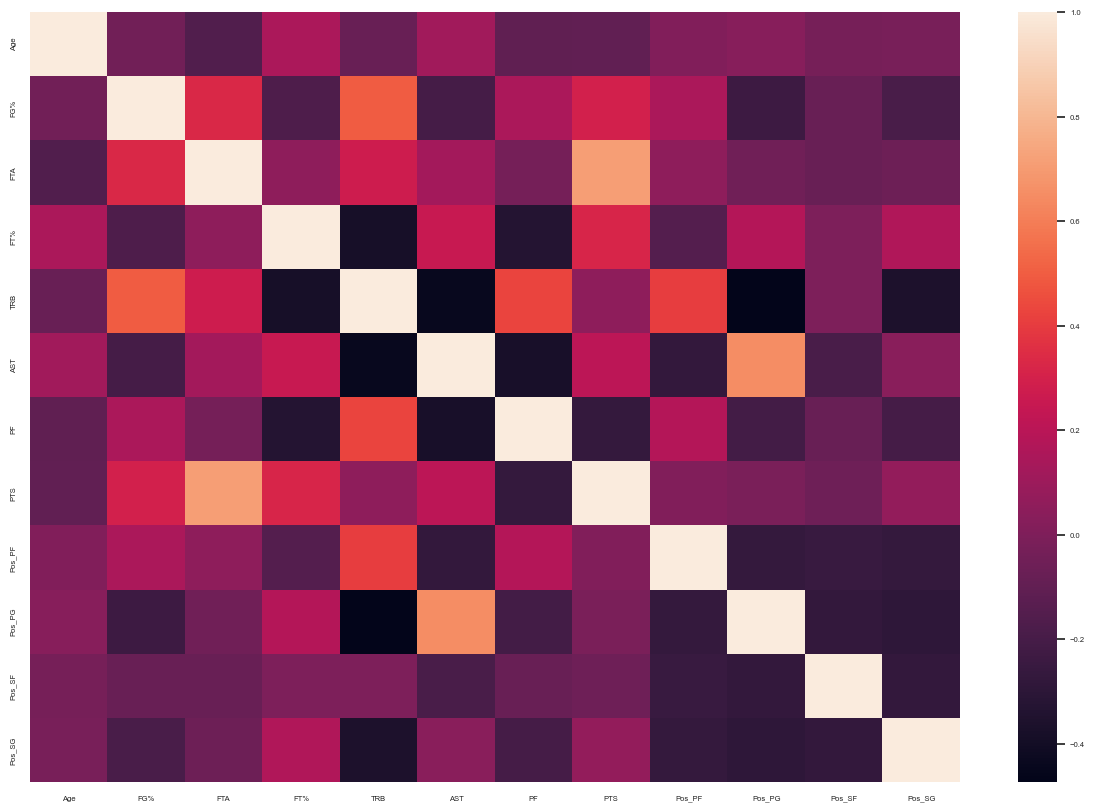

In [161]:
# derive correlation matrix 
corrDataJumpPercReduced = predictorsJumpPercReduced.corr()
corrDataJumpPercReduced.dropna()

# visualize correlation matrix

plt.figure(figsize=(15, 10))
sns.set(font_scale=0.5)
sns.heatmap(corrDataJumpPercReduced)
plt.show()

In [163]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets

xTrainJumpPerc, xTestJumpPerc, yTrainJumpPerc, yTestJumpPerc = train_test_split(predictorsJumpPercReduced, outcomeJumpPerc, test_size=0.2)

In [165]:
# instantiate Linear Regression
lmJumpPerc = LinearRegression()

# calculate cv scores
cvScoresJumpPercLM = cross_validate(lmJumpPerc, xTrainJumpPerc, yTrainJumpPerc, cv = cvParam, scoring = ('r2', 'neg_mean_squared_error'), return_train_score = True)
rmseJumpPercLM = np.sqrt(-1 * np.mean(cvScoresJumpPercLM['train_neg_mean_squared_error']))

print('train RMSE: ' + str(rmseJumpPercLM))
print('train r2: ' + str(np.mean(cvScoresJumpPercLM['train_r2'])))

train RMSE: 0.7855207434763674
train r2: 0.39562601993163005


In [169]:
# test against the test set
lmJumpPerc.fit(xTrainJumpPerc, yTrainJumpPerc)
yJumpPercPredLm = lmJumpPerc.predict(xTestJumpPerc)

testJumpPercR2lm = r2_score(yJumpPercPredLm, yTestJumpPerc)
testJumpPercRMSElm = np.sqrt(mean_squared_error(yJumpPercPredLm, yTestJumpPerc))

print('test RMSE: '+str(testJumpPercRMSElm))
print('test r2: '+str(testJumpPercR2lm))

test RMSE: 0.7476557282517571
test r2: -0.47152364628952714


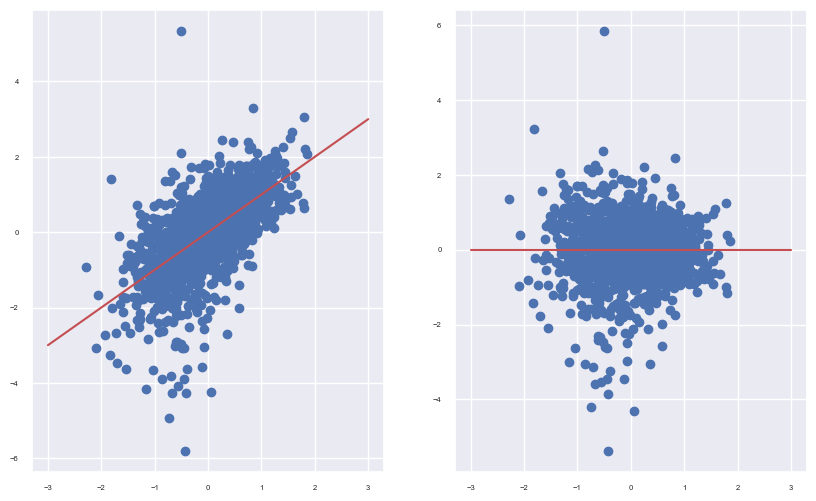

In [171]:
# graph predictions vs test set
yRange = np.linspace(-3, 3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.scatter(yJumpPercPredLm, yTestJumpPerc)
ax1.plot(yRange, yRange, c = 'r')

ax2.scatter(yJumpPercPredLm, yTestJumpPerc - yJumpPercPredLm)
ax2.plot(yRange, (yRange - yRange), c = 'r')

plt.show()

In [173]:
# instantiate PLS Regression

rmseJumpPercPLS = []
r2JumpPercPLS = []

for i in range(1, 13):
    pls = PLSRegression(n_components = i)
    score = cross_validate(pls, xTrainJumpPerc, yTrainJumpPerc, cv = cvParam, scoring = ('r2', 'neg_mean_squared_error'), return_train_score = True)
    rmseJumpPercPLS.append(np.sqrt(-np.mean(score['train_neg_mean_squared_error'])))
    r2JumpPercPLS.append(np.mean(score['train_r2']))

# print minimum RMSE for PLS
print('Minimum RMSE for PLS: ' + str(np.min(rmseJumpPercPLS)))

# number of units used for min RMSE
print('# of components for RMSE PLS: ' + str(np.argmin(rmseJumpPercPLS)))

print('==========================')

# maximum r2 for PLS
print('Maximum r2 for PLS: ' + str(np.max(r2JumpPercPLS)))

# number of units used for max r2
print('# of components for R2 PLS: ' + str(np.argmax(r2JumpPercPLS)))

Minimum RMSE for PLS: 0.7855022509339222
# of components for RMSE PLS: 9
Maximum r2 for PLS: 0.395626985856304
# of components for R2 PLS: 9


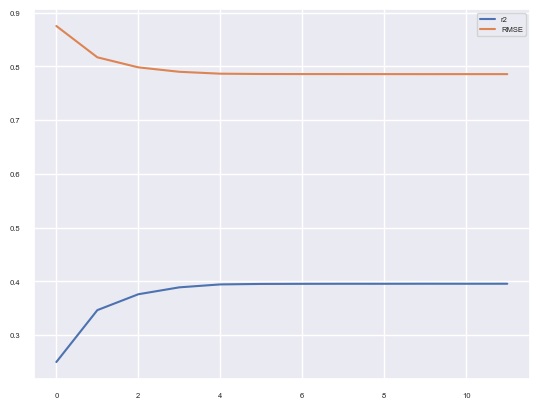

In [175]:
plt.plot(r2JumpPercPLS, label = 'r2')
plt.plot(rmseJumpPercPLS, label = 'RMSE')
plt.legend()
plt.show()

In [177]:
# get predictions
plsJumpPerc = PLSRegression(n_components = 9)
plsJumpPerc.fit(xTrainJumpPerc, yTrainJumpPerc)
yJumpPercPredPLS = plsJumpPerc.predict(xTestJumpPerc)

testJumpPercR2pls = r2_score(yJumpPercPredPLS, yTestJumpPerc)
testJumpPercRMSEpls = np.sqrt(mean_squared_error(yJumpPercPredPLS, yTestJumpPerc))

print('test RMSE: '+str(testJumpPercRMSEpls))
print('test r2: '+str(testJumpPercR2pls))

test RMSE: 0.7477081216773417
test r2: -0.47115710658369303


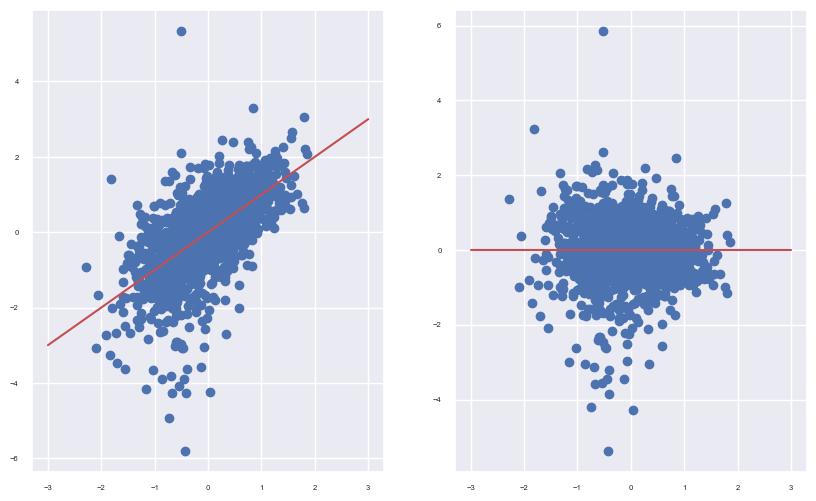

In [179]:
# graph predictions vs test set
yRange = np.linspace(-3, 3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.scatter(yJumpPercPredPLS, yTestJumpPerc)
ax1.plot(yRange, yRange, c = 'r')

ax2.scatter(yJumpPercPredPLS, yTestJumpPerc - yJumpPercPredPLS)
ax2.plot(yRange, (yRange - yRange), c = 'r')

plt.show()

In [181]:
# GridSearch Ridge Regression

ridgeParam = {'alpha': np.linspace(0, 50, 51)}

gsRidgeJumpPerc = GridSearchCV(Ridge(), ridgeParam, cv = cvParam, n_jobs = -1)
gsRidgeJumpPerc.fit(xTrainJumpPerc, yTrainJumpPerc)

gsJumpPercCVridge = pd.DataFrame(gsRidgeJumpPerc.cv_results_)[['mean_test_score', 'std_test_score' , 'params']]
gsJumpPercCVridge

,mean_test_score,std_test_score,params
0,0.391382,0.021615,{'alpha': 0.0}
1,0.391386,0.021612,{'alpha': 1.0}
2,0.391390,0.021610,{'alpha': 2.0}
3,0.391394,0.021608,{'alpha': 3.0}
4,0.391397,0.021606,{'alpha': 4.0}
5,0.391400,0.021603,{'alpha': 5.0}
6,0.391403,0.021601,{'alpha': 6.0}
7,0.391405,0.021599,{'alpha': 7.0}
8,0.391408,0.021596,{'alpha': 8.0}
9,0.391410,0.021594,{'alpha': 9.0}


In [183]:
# calculate cv scores
cvScoresRidgeJumpPerc = cross_validate(gsRidgeJumpPerc, xTrainJumpPerc, yTrainJumpPerc, cv = cvParam, scoring = ('r2', 'neg_mean_squared_error'), return_train_score = True)
rmseRidgeJumpPerc = np.sqrt(-1 * np.mean(cvScoresRidgeJumpPerc['train_neg_mean_squared_error']))

print('train RMSE: ' + str(rmseRidgeJumpPerc))
print('train r2: ' + str(np.mean(cvScoresRidgeJumpPerc['train_r2'])))
gsRidgeJumpPerc.best_estimator_

train RMSE: 0.7855539395038765
train r2: 0.3955525334555664


Ridge(alpha=21.0)

In [185]:
# test against the test set
yJumpPercPredRidge = gsRidgeJumpPerc.predict(xTestJumpPerc)

testJumpPercR2ridge = r2_score(yJumpPercPredRidge, yTestJumpPerc)
testJumpPercRMSEridge = np.sqrt(mean_squared_error(yJumpPercPredRidge, yTestJumpPerc))

print('test RMSE: '+str(testJumpPercRMSEridge))
print('test r2: '+str(testJumpPercR2ridge))

test RMSE: 0.7476306220784557
test r2: -0.4856711632897224


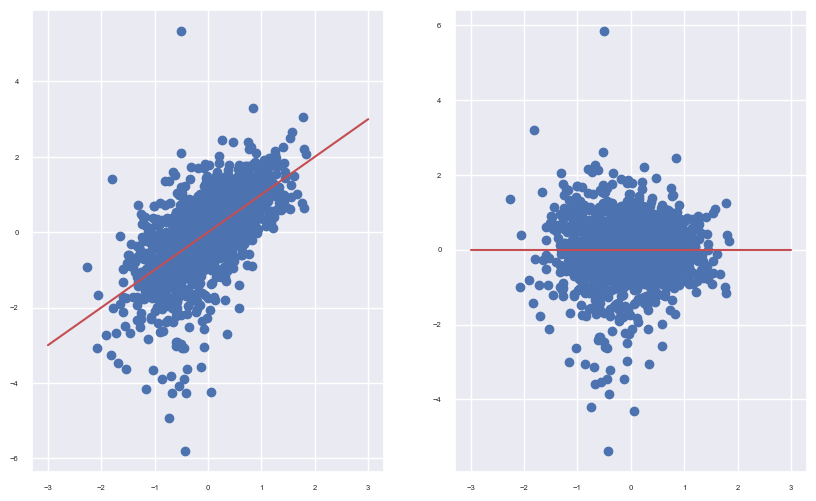

In [187]:
# graph predictions vs test set
yRange = np.linspace(-3, 3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.scatter(yJumpPercPredRidge, yTestJumpPerc)
ax1.plot(yRange, yRange, c = 'r')

ax2.scatter(yJumpPercPredRidge, yTestJumpPerc - yJumpPercPredRidge)
ax2.plot(yRange, (yRange - yRange), c = 'r')

plt.show()

In [189]:
# Grid Search SVM model

svmParams = {'kernel': ['poly','rbf'],
             'epsilon': [0.01, 0.05, 0.1, 0.5, 1],
             'C': [0.1, 1, 5, 10, 15, 25]}

gsJumpPercSVM = GridSearchCV(SVR(), svmParams, cv = 5, n_jobs = -1)
gsJumpPercSVM.fit(xTrainJumpPerc, np.ravel(yTrainJumpPerc))

gsJumpPercCVsvm = pd.DataFrame(gsJumpPercSVM.cv_results_)[['mean_test_score', 'std_test_score' , 'params']]
gsJumpPercCVsvm

,mean_test_score,std_test_score,params
0,0.364987,0.019607,"{'C': 0.1, 'epsilon': 0.01, 'kernel': 'poly'}"
1,0.435458,0.021890,"{'C': 0.1, 'epsilon': 0.01, 'kernel': 'rbf'}"
2,0.366098,0.020186,"{'C': 0.1, 'epsilon': 0.05, 'kernel': 'poly'}"
3,0.435146,0.021692,"{'C': 0.1, 'epsilon': 0.05, 'kernel': 'rbf'}"
4,0.367363,0.020784,"{'C': 0.1, 'epsilon': 0.1, 'kernel': 'poly'}"
5,0.434331,0.022029,"{'C': 0.1, 'epsilon': 0.1, 'kernel': 'rbf'}"
6,0.369032,0.019056,"{'C': 0.1, 'epsilon': 0.5, 'kernel': 'poly'}"
7,0.429932,0.020620,"{'C': 0.1, 'epsilon': 0.5, 'kernel': 'rbf'}"
8,0.348056,0.018068,"{'C': 0.1, 'epsilon': 1, 'kernel': 'poly'}"
9,0.398688,0.017936,"{'C': 0.1, 'epsilon': 1, 'kernel': 'rbf'}"


In [191]:
# calculate cv scores
cvScoresJumpPercSVM = cross_validate(gsJumpPercSVM, xTrainJumpPerc, np.ravel(yTrainJumpPerc), cv = 5, scoring = ('r2', 'neg_mean_squared_error'), return_train_score = True)
rmseJumpPercSVM = np.sqrt(-1 * np.mean(cvScoresJumpPercSVM['train_neg_mean_squared_error']))

print('train RMSE: ' + str(rmseJumpPercSVM))
print('train r2: ' + str(np.mean(cvScoresJumpPercSVM['train_r2'])))
print('Best Estimator: ' + str(gsJumpPercCVsvm.loc[(gsJumpPercCVsvm['mean_test_score'] == gsJumpPercCVsvm['mean_test_score'].max()), 'params']))

train RMSE: 0.7021228525440858
train r2: 0.5171385692428927
Best Estimator: 17    {'C': 1, 'epsilon': 0.5, 'kernel': 'rbf'}
Name: params, dtype: object


In [193]:
# test against the test set
yJumpPercPredSVR = gsJumpPercSVM.predict(xTestJumpPerc)

testJumpPercR2svr = r2_score(yJumpPercPredSVR, yTestJumpPerc)
testJumpPercRMSEsvr = np.sqrt(mean_squared_error(yJumpPercPredSVR, yTestJumpPerc))

print('test RMSE: '+str(testJumpPercRMSEsvr))
print('test r2: '+str(testJumpPercR2svr))

test RMSE: 0.7140083982651606
test r2: -0.20230699644998995


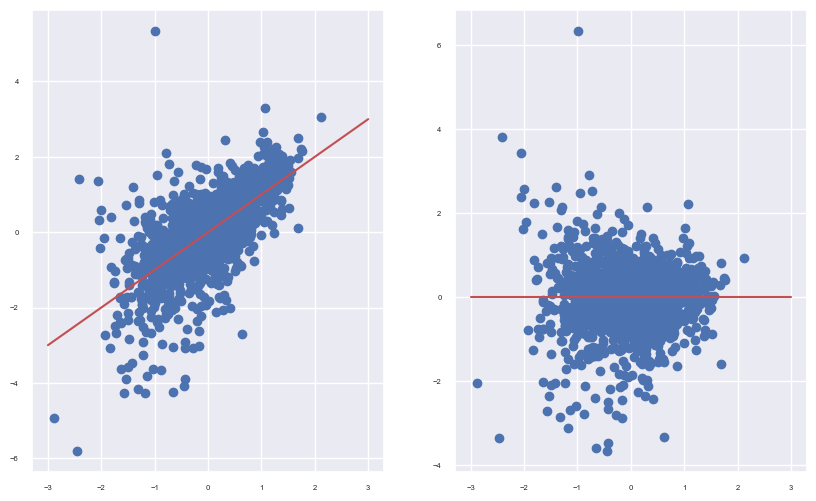

In [195]:
# graph predictions vs test set
yRange = np.linspace(-3, 3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.scatter(yJumpPercPredSVR, yTestJumpPerc)
ax1.plot(yRange, yRange, c = 'r')

ax2.scatter(yJumpPercPredSVR, (yTestJumpPerc - yJumpPercPredSVR.reshape(yTestJumpPerc.shape)))
ax2.plot(yRange, (yRange - yRange), c = 'r')

plt.show()

In [197]:
# Grid Search MLPRegressor

import warnings
warnings.filterwarnings("ignore")

mlpParams = {'hidden_layer_sizes': [(10, ), (50, ), (100, ), (50, 20, ), (100, 50, ), (50, 30, 10, ), (100, 50, 20, ), (50, 30, 20, 10, )],
            'alpha': [0.00, 0.0001, 0.001, 0.01, 0.1, 1],
            'max_iter': [500, 1000]}

gsJumpPercMLP = GridSearchCV(MLPRegressor(), mlpParams, cv = 5, n_jobs = -1)
gsJumpPercMLP.fit(xTrainJumpPerc, np.ravel(yTrainJumpPerc))

gsJumpPercCVmlp = pd.DataFrame(gsJumpPercMLP.cv_results_)[['mean_test_score', 'std_test_score' , 'params']]
gsJumpPercCVmlp

,mean_test_score,std_test_score,params
0,0.451356,0.025753,"{'alpha': 0.0, 'hidden_layer_sizes': (10,), 'm..."
1,0.456226,0.027638,"{'alpha': 0.0, 'hidden_layer_sizes': (10,), 'm..."
2,0.442512,0.032678,"{'alpha': 0.0, 'hidden_layer_sizes': (50,), 'm..."
3,0.442717,0.029076,"{'alpha': 0.0, 'hidden_layer_sizes': (50,), 'm..."
4,0.426562,0.032281,"{'alpha': 0.0, 'hidden_layer_sizes': (100,), '..."
...,...,...,...
91,0.459592,0.024380,"{'alpha': 1, 'hidden_layer_sizes': (50, 30, 10..."
92,0.453475,0.034011,"{'alpha': 1, 'hidden_layer_sizes': (100, 50, 2..."
93,0.458344,0.026496,"{'alpha': 1, 'hidden_layer_sizes': (100, 50, 2..."
94,0.462005,0.027371,"{'alpha': 1, 'hidden_layer_sizes': (50, 30, 20..."


In [199]:
# calculate cv scores
cvScoresJumpPercMLP = cross_validate(gsJumpPercMLP, xTrainJumpPerc, np.ravel(yTrainJumpPerc), cv = 5, scoring = ('r2', 'neg_mean_squared_error'), return_train_score = True)
rmseJumpPercMLP = np.sqrt(-1 * np.mean(cvScoresJumpPercMLP['train_neg_mean_squared_error']))

print('train RMSE: ' + str(rmseJumpPercMLP))
print('train r2: ' + str(np.mean(cvScoresJumpPercMLP['train_r2'])))
print('Best Estimator: ' + str(gsJumpPercCVmlp.loc[(gsJumpPercCVmlp['mean_test_score'] == gsJumpPercCVmlp['mean_test_score'].max()), 'params']))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


train RMSE: 0.7236172568788752
train r2: 0.4871353077496471
Best Estimator: 85    {'alpha': 1, 'hidden_layer_sizes': (100,), 'ma...
Name: params, dtype: object


In [201]:
# test against the test set
yJumpPercPredMLP = gsJumpPercMLP.predict(xTestJumpPerc)

testJumpPercR2mlp = r2_score(yJumpPercPredMLP, yTestJumpPerc)
testJumpPercRMSEmlp = np.sqrt(mean_squared_error(yJumpPercPredMLP, yTestJumpPerc))

print('test RMSE: '+str(testJumpPercRMSEmlp))
print('test r2: '+str(testJumpPercR2mlp))

test RMSE: 0.7160494972438577
test r2: -0.2086154228301622


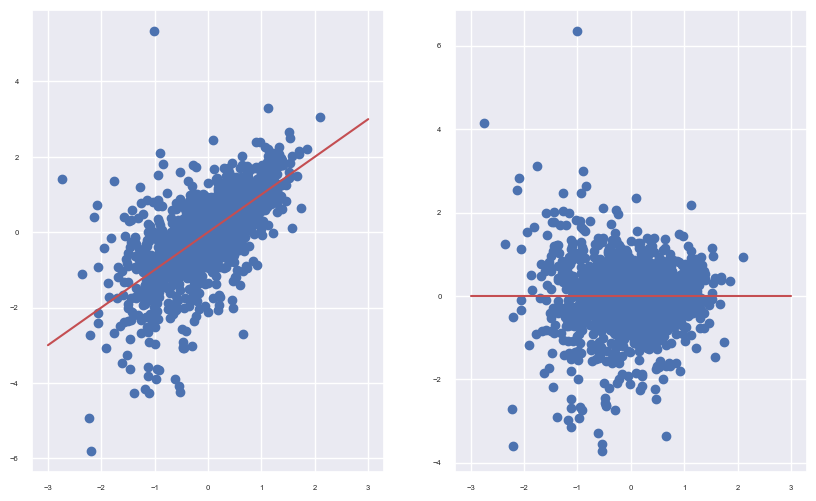

In [203]:
# graph predictions vs test set
yRange = np.linspace(-3, 3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.scatter(yJumpPercPredMLP, yTestJumpPerc)
ax1.plot(yRange, yRange, c = 'r')

ax2.scatter(yJumpPercPredMLP, yTestJumpPerc - yJumpPercPredMLP.reshape(yTestJumpPerc.shape))
ax2.plot(yRange, (yRange - yRange), c = 'r')

plt.show()

In [251]:
df1970 = pd.read_csv('Per_36 Box Score Data/NBA Per_36 Box Score Data 1970 - Sheet1.csv')
df1970 = df1970[(df1970['Team'] != '2TM') | (df1970['Team'] != '3TM') | (df1970['Team'] != '4TM') | (df1970['Team'] != '5TM')]
df1970 = df1970[df1970['MP'] > 375]
df1970.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,FT,FTA,FT%,TRB,AST,PF,PTS,Awards,Player-additional
0,1,Elvin Hayes,24,SDR,C,82,NaN,3665,9.0,19.8,0.452,4.2,6.1,0.688,13.6,1.6,2.7,22.2,AS,hayesel01
1,2,Kareem Abdul-Jabbar,22,MIL,C,82,NaN,3534,9.6,18.4,0.518,4.9,7.6,0.653,12.1,3.4,2.9,24.1,MVP-3ROY-1ASNBA2,abdulka01
2,3,John Havlicek,29,BOS,SG,81,NaN,3369,7.9,16.9,0.464,5.2,6.2,0.844,6.8,5.9,2.3,20.9,MVP-10ASNBA2,havlijo01
3,4,Connie Hawkins,27,PHO,SF,81,NaN,3312,7.7,15.7,0.490,6.3,8.1,0.779,9.2,4.2,3.1,21.7,MVP-5ASNBA1,hawkico01
4,5,Bill Bridges,30,ATL,PF,82,NaN,3269,4.9,10.3,0.475,3.6,5.0,0.734,13.0,3.8,3.2,13.4,MVP-8AS,bridgbi01


In [253]:
df1970.shape

(161, 20)

In [255]:
df1970 = df1970.drop(['Rk', 'Team', 'G', 'GS', 'MP', 'FG', 'FGA', 'FT', 'Awards', 'Player-additional'], axis = 1)
df1970.head()

,Player,Age,Pos,FG%,FTA,FT%,TRB,AST,PF,PTS
0,Elvin Hayes,24,C,0.452,6.1,0.688,13.6,1.6,2.7,22.2
1,Kareem Abdul-Jabbar,22,C,0.518,7.6,0.653,12.1,3.4,2.9,24.1
2,John Havlicek,29,SG,0.464,6.2,0.844,6.8,5.9,2.3,20.9
3,Connie Hawkins,27,SF,0.490,8.1,0.779,9.2,4.2,3.1,21.7
4,Bill Bridges,30,PF,0.475,5.0,0.734,13.0,3.8,3.2,13.4


In [257]:
dummies = pd.get_dummies(df1970.iloc[:, 1:], drop_first = True, dtype = 'int')
df1970[['Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_SG']] = dummies[['Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_SG']]
df1970 = df1970.drop('Pos', axis = 1)
df1970.head()

,Player,Age,FG%,FTA,FT%,TRB,AST,PF,PTS,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,Elvin Hayes,24,0.452,6.1,0.688,13.6,1.6,2.7,22.2,0,0,0,0
1,Kareem Abdul-Jabbar,22,0.518,7.6,0.653,12.1,3.4,2.9,24.1,0,0,0,0
2,John Havlicek,29,0.464,6.2,0.844,6.8,5.9,2.3,20.9,0,0,0,1
3,Connie Hawkins,27,0.490,8.1,0.779,9.2,4.2,3.1,21.7,0,0,1,0
4,Bill Bridges,30,0.475,5.0,0.734,13.0,3.8,3.2,13.4,1,0,0,0


In [259]:
df1970.isna().sum()

Player    0
Age       0
FG%       0
FTA       0
FT%       0
TRB       0
AST       0
PF        0
PTS       0
Pos_PF    0
Pos_PG    0
Pos_SF    0
Pos_SG    0
dtype: int64

In [261]:
# center and scale
noName = df1970.iloc[:, 1:]

noName.iloc[:, :-4] = noName.iloc[:, :-4].apply(lambda x: boxcox(x + 0.01)[0])
noName.iloc[:, :-4] = noName.iloc[:, :-4].apply(lambda x: scale(x))

df1970 = pd.concat([df1970.iloc[:, 0], noName], axis = 1)
df1970.head()

,Player,Age,FG%,FTA,FT%,TRB,AST,PF,PTS,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,Elvin Hayes,-0.807963,0.040395,0.900619,-0.747254,1.394806,-1.281778,-1.294925,1.551870,0,0,0,0
1,Kareem Abdul-Jabbar,-1.701768,1.496345,1.595473,-1.109892,1.086559,0.227431,-1.036404,2.046565,0,0,0,0
2,John Havlicek,0.791892,0.296238,0.951839,1.400418,-0.210103,1.264195,-1.882231,1.210246,0,0,0,1
3,Connie Hawkins,0.237942,0.864196,1.797771,0.393250,0.426497,0.631443,-0.796909,1.420791,0,0,1,0
4,Bill Bridges,1.035573,0.534266,0.276450,-0.207945,1.273797,0.441113,-0.683497,-0.822190,1,0,0,0


In [263]:
percentageJumpPrediction = gsPercJumpSVM.predict(df1970.iloc[:, 1:])
jumpshotPercPrediction = gsJumpPercSVM.predict(df1970.iloc[:, 1:])

df1970['percentageJumpPred'] = percentageJumpPrediction
df1970['jumpshotPercPrediction'] = jumpshotPercPrediction
df1970.head()

,Player,Age,FG%,FTA,FT%,TRB,AST,PF,PTS,Pos_PF,Pos_PG,Pos_SF,Pos_SG,percentageJumpPred,jumpshotPercPrediction
0,Elvin Hayes,-0.807963,0.040395,0.900619,-0.747254,1.394806,-1.281778,-1.294925,1.551870,0,0,0,0,-0.759815,-0.158367
1,Kareem Abdul-Jabbar,-1.701768,1.496345,1.595473,-1.109892,1.086559,0.227431,-1.036404,2.046565,0,0,0,0,-1.107917,0.081086
2,John Havlicek,0.791892,0.296238,0.951839,1.400418,-0.210103,1.264195,-1.882231,1.210246,0,0,0,1,0.394508,0.772171
3,Connie Hawkins,0.237942,0.864196,1.797771,0.393250,0.426497,0.631443,-0.796909,1.420791,0,0,1,0,-0.315102,0.327741
4,Bill Bridges,1.035573,0.534266,0.276450,-0.207945,1.273797,0.441113,-0.683497,-0.822190,1,0,0,0,-0.741107,-0.408231


In [267]:
df1970 = df1970.sort_values('jumpshotPercPrediction', ascending = False)
df1970.head(15)

,Player,Age,FG%,FTA,FT%,TRB,AST,PF,PTS,Pos_PF,Pos_PG,Pos_SF,Pos_SG,percentageJumpPred,jumpshotPercPrediction
47,Dick Snyder,-0.425391,1.796947,-1.207260,0.852394,-0.840378,1.031497,0.102765,-0.049538,0,0,0,1,0.381211,1.726180
45,Dick Snyder,-0.425391,1.727181,-1.207260,0.898850,-0.840378,0.995466,0.188613,-0.104117,0,0,0,1,0.389164,1.687834
16,Jon McGlocklin,-0.078242,1.773666,-1.991747,1.570757,-1.499222,0.390087,-2.402370,0.330138,0,0,0,1,1.219277,1.654762
146,Al Tucker,-0.078242,1.381921,-1.412352,1.040400,-0.068649,-0.823786,-0.468007,-0.405918,1,0,0,0,0.557655,1.630970
11,Lou Hudson,-0.425391,1.796947,0.399236,1.072303,-1.019031,0.109998,-1.432260,1.942852,0,0,1,0,0.453471,1.575430
96,Cazzie Russell,-0.425391,1.042660,-0.660888,0.336732,-0.638620,0.048227,-0.683497,1.131024,0,0,1,0,0.688871,1.446567
138,Don Ohl,1.660701,0.490740,-1.747149,0.791016,-1.728515,0.337526,0.188613,-0.378365,0,0,0,1,1.436206,1.416138
30,Flynn Robinson,0.526923,0.577901,1.051925,2.371640,-1.371025,1.264195,-0.573944,1.760805,0,1,0,0,0.776362,1.366436
19,Jack Marin,-0.425391,0.842010,-0.342385,1.400418,-0.268232,-0.222755,-0.914446,0.919028,0,0,1,0,0.732331,1.317334
145,Al Tucker,-0.078242,1.359117,-0.578251,0.775771,-0.068649,-1.156408,-0.076298,-0.131440,1,0,0,0,-0.043345,1.293545


In [275]:
df1970[df1970['Player'] == 'Jerry West']

,Player,Age,FG%,FTA,FT%,TRB,AST,PF,PTS,Pos_PF,Pos_PG,Pos_SF,Pos_SG,percentageJumpPred,jumpshotPercPrediction
10,Jerry West,1.260302,1.020257,2.168453,1.072303,-1.170088,1.412568,-2.595197,2.740998,0,1,0,0,-0.21256,0.685729
